In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size
IMG_SIZE = 128

# Create a synthetic dataset
def create_synthetic_dataset(num_samples=100):
    dataset = []
    categories = ["eiffel_tower", "statue_of_liberty", "taj_mahal"]
    for i in range(num_samples):
        # Create a random image of a single color
        if i % 3 == 0:
            img_array = np.full((IMG_SIZE, IMG_SIZE, 3), [255, 0, 0], dtype=np.uint8)  # Red square
            label = 0
        elif i % 3 == 1:
            img_array = np.full((IMG_SIZE, IMG_SIZE, 3), [0, 255, 0], dtype=np.uint8)  # Green square
            label = 1
        else:
            img_array = np.full((IMG_SIZE, IMG_SIZE, 3), [0, 0, 255], dtype=np.uint8)  # Blue square
            label = 2

        dataset.append([img_array, label])

    return dataset, categories

# Generate the synthetic dataset
dataset, categories = create_synthetic_dataset(num_samples=300)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Prepare data for training
X = []
y = []

for features, label in dataset:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X / 255.0  # Normalize

y = np.array(y)

# Verify dataset creation
print(f"Dataset created with {len(X)} samples.")
print(f"Categories: {categories}")
print(f"Sample image shape: {X[0].shape}")


Dataset created with 300 samples.
Categories: ['eiffel_tower', 'statue_of_liberty', 'taj_mahal']
Sample image shape: (128, 128, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X, y, epochs=10, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 894ms/step - accuracy: 0.8084 - loss: 0.4322 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 918ms/step - accuracy: 1.0000 - loss: 8.7538e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 881ms/step - accuracy: 1.0000 - loss: 5.3291e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 857ms/step - accuracy: 1.0000 - loss: 4.2476e-10 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 975ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 790ms/step - accuracy: 1.0000

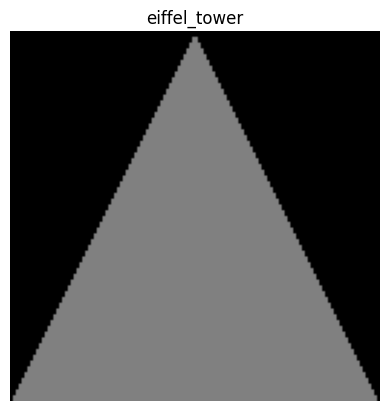

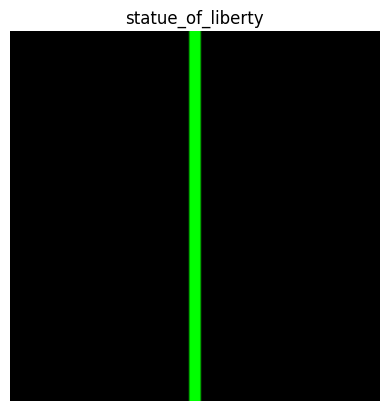

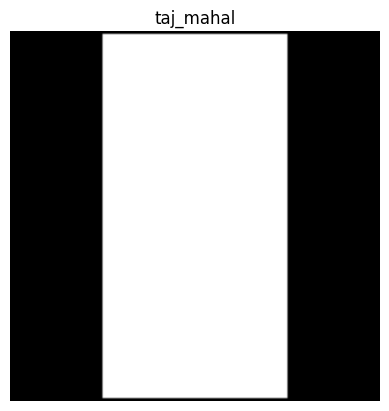

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
IMG_SIZE = 128

# Categories for synthetic landmarks
categories = ["eiffel_tower", "statue_of_liberty", "taj_mahal"]

# Function to generate a sample image for each landmark category
def generate_sample_landmark_images(categories, img_size):
    images = []
    for category in categories:
        # Create synthetic "landmark" images by adding simple patterns or shapes
        img = np.zeros((img_size, img_size, 3), dtype=np.uint8)  # Start with a black image

        if category == "eiffel_tower":
            # Create a simple triangular shape to simulate the Eiffel Tower
            for i in range(img_size):
                img[i, img_size//2 - i//2: img_size//2 + i//2] = [128, 128, 128]  # Gray triangle

        elif category == "statue_of_liberty":
            # Create a simple vertical line to simulate the Statue of Liberty
            img[:, img_size//2 - 2:img_size//2 + 2] = [0, 255, 0]  # Green line

        elif category == "taj_mahal":
            # Create a dome-like shape to simulate the Taj Mahal
            for i in range(img_size//2):
                img[img_size//2 - i: img_size//2 + i, img_size//4: 3*img_size//4] = [255, 255, 255]  # White dome

        images.append(img)
    return images

# Generate sample landmark images
sample_landmark_images = generate_sample_landmark_images(categories, IMG_SIZE)

# Display sample landmark images
for i, img in enumerate(sample_landmark_images):
    plt.figure()
    plt.title(categories[i])
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()


In [ ]:
pip install opencv-python opencv-contrib-python


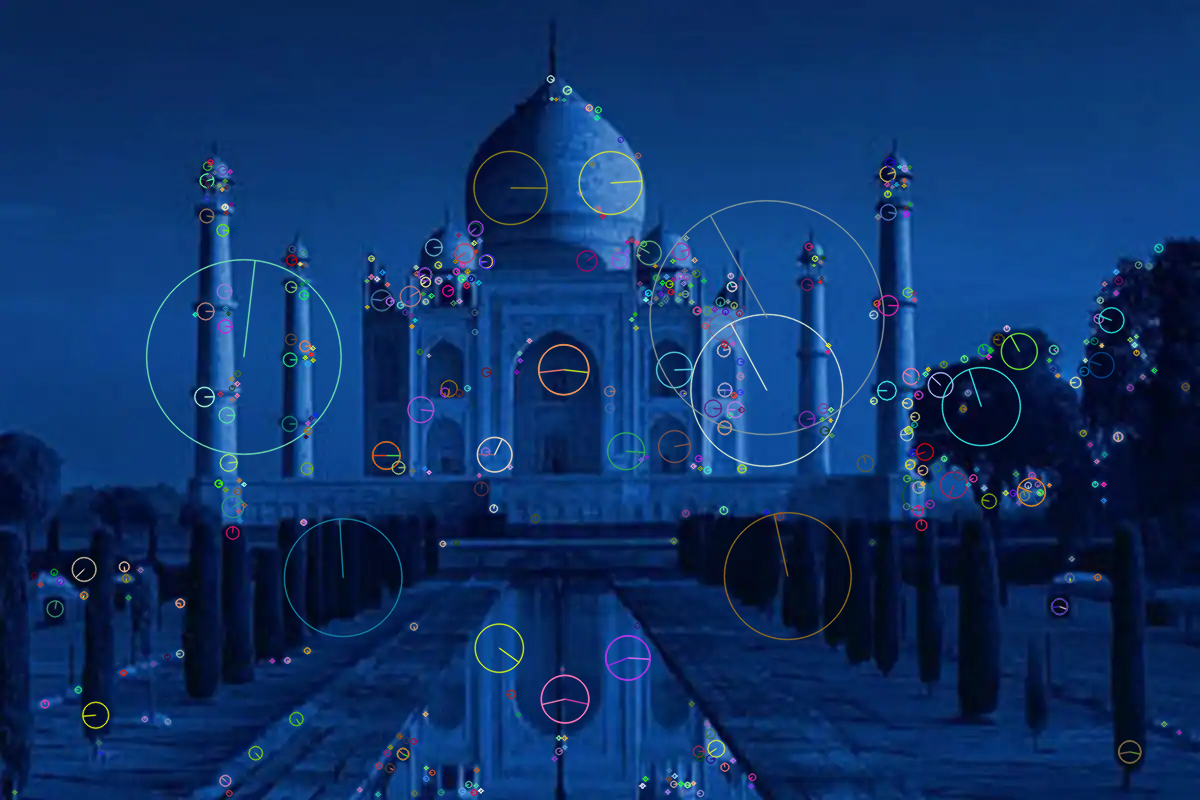

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/Taj Mahal - 8.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute the descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw the keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
cv2_imshow(image_with_keypoints)

# Optionally, save the image with keypoints
output_path = '/content/output_image_with_keypoints.jpg'
cv2.imwrite(output_path, image_with_keypoints)
